# Classification

## Inputs & outputs
import numpy as np
import numpy as np
import tensorflow as tf
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd

### Inputs

\[batch_size * Width * Height * color_channels\]

\[None, 224, 224, 3\]

\[32, 224, 224, 3\]

32 is a very common batch size

### Output

\[number of classes representing the prediction probabilities\]

\[3\] for 3 class prediction probabilities

## Typical Architecture of a Classification Neural Network

| Hyperparameters          | Binary Classification                                                                                        | Multiclass Classification                                              |
|--------------------------|--------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------|
| Input layer shape        | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification                                          |
| Hidden layer(s)          | Problem specific, minimum=1, maximum = inf                                                                   | Same as binary                                                         |
| Neurons per hidden layer | Problem specific, generally 10 - 100                                                                         | Same as binary                                                         |
| Output layer shape       | 1 (one class or the other)                                                                                   | 1 per class                                                            |
| Hidden activation        | Usually ReLU (rectified Liner Unit)                                                                          | Same as binary                                                         |
| Output activation        | Sigmoid                                                                                                      | Softmax                                                                |
| Loss function            | Cross entropy (tf.keras.losses.BinaryCrossentropy in TensorFlow)                                             | Cross entropy (tf.keras.losses.Categorical Crossentropy in TensorFlow) |
| Optimizer                | SGD (Stochastic Gradient Decent), Adam                                                                       | Same as biniary                                                        |

## Types of classification problems
* Binary
* Multiclass
* Multilabel

## Creating data to view and fit

In [13]:

from sklearn.datasets import make_circles

# Make a 1000 examples
n_samples = 1000

RANDOM_STATE = 42

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=RANDOM_STATE)
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

**Note:** Let's Visualize our data

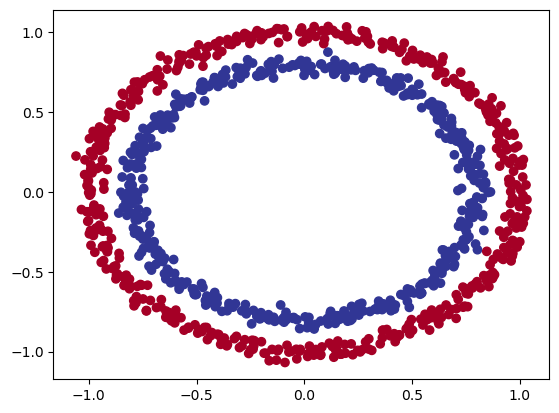

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [15]:
import pandas as pd

circles = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'label': y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


## Inputs and Outputs

In [16]:
X.shape, y.shape

((1000, 2), (1000,))

In [17]:
len(X), len(y)

(1000, 1000)

In [18]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [21]:
INPUT_SHAPE = X.shape[1]
OUTPUT_SHAPE = 1

In [22]:
tf.random.set_seed(RANDOM_STATE)

callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3, restore_best_weights=True)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(INPUT_SHAPE),
    # tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.003),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, verbose=0)

2023-09-14 12:21:30.181766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [23]:
loss = model.evaluate(X_test, y_test)
loss

1/7 [===>..........................] - ETA: 1s - loss: 0.7000 - accuracy: 0.3750

2023-09-14 12:21:39.529716: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 24ms/step - loss: 0.6956 - accuracy: 0.5050


[0.6956428289413452, 0.5049999952316284]

In [24]:
len(history.history['loss'])

100

Text(0, 0.5, 'loss')

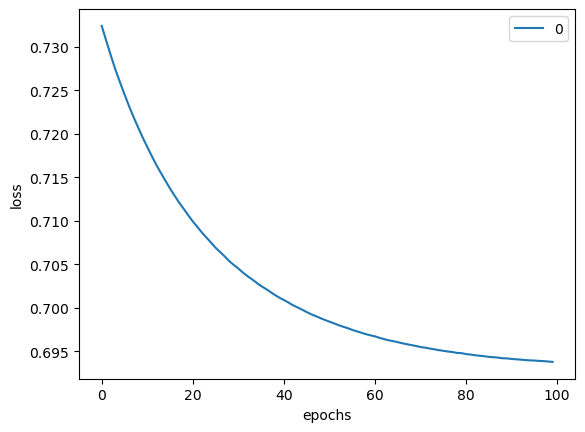

In [25]:
pd.DataFrame(history.history['loss']).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

## Improving our classification model

Let's look into our bag of tricks to see how to improve our model:

1. Add more layers or adding more hidden units.
2. We can choose a different optimization function SGD/Adam.
3. Run for more epochs.

In [26]:
# Increase the number of hidden units
tf.random.set_seed(RANDOM_STATE)
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])
model3.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.BinaryCrossentropy(),
               metrics=['accuracy'])
model3.fit(X_train, y_train, epochs=100, verbose=0)

2023-09-14 12:21:40.182483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [27]:
loss = model3.evaluate(X_test, y_test)
loss

1/7 [===>..........................] - ETA: 0s - loss: 0.7124 - accuracy: 0.3750

2023-09-14 12:21:52.548213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 25ms/step - loss: 0.6973 - accuracy: 0.4950


[0.697326123714447, 0.4950000047683716]

To visualize our models predictions lets create a function `plot_decision_boundry()`

* Take in a trained model, features (X) and labels (y).
* Create a meshgrid of the different X values.
* Make predictions across the meshgrid.
* Plot the predictions as well as a line between zones (where each unique class lies).

In [28]:
import numpy as np


def plot_decision_boundary(model_test, X_param, y_param):
    """
    Plots the decision boundary created by a model and creates a visual meshgrid
    :param model_test: 
    :param X_param: 
    :param y_param: 
    :return: None
    """
    # axis boundaries 
    x_min, x_max = X_param[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X_param[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model_test.predict(x_in)

    # Check if multiclass and reshape by rounding or checking the maximum value.
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X_param[:, 0], X_param[:, 1], c=y_param, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

 73/313 [=====>........................] - ETA: 0s

2023-09-14 12:21:52.852755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Doing binary classification


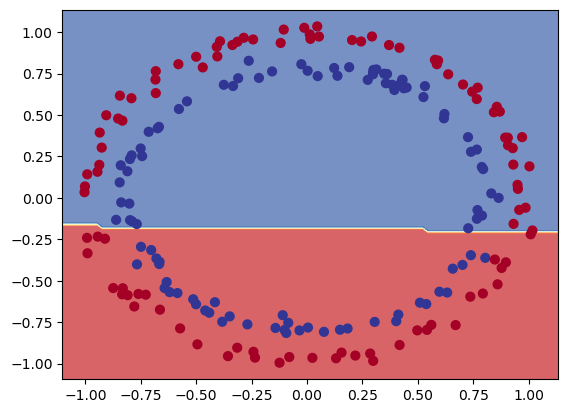

In [29]:
plot_decision_boundary(model3, X_test, y_test)

**Resource:**
1. [CS231n Convolutional Neural Networks for Visual Recognition: Putting it together: Minimal Neural Network Case Study](https://cs231n.github.io/neural-networks-case-study/).
2. [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/)

In [52]:
tf.random.set_seed(RANDOM_STATE)
model3_reg = tf.keras.Sequential([
    # tf.keras.layers.InputLayer([None, 1], name='input_layer'),
    tf.keras.layers.Dense(100, name='1_st_layer'),
    tf.keras.layers.Dense(10, name='2_nd_layer'),
    tf.keras.layers.Dense(1, name='3_rd_layer'),
], name='regression_model')
model3_reg.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=tf.keras.losses.mae,
                   metrics=['mae'])

In [53]:
# check for regression

tf.random.set_seed(RANDOM_STATE)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)  # y = X + 100

# Split data to train and test
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

X_reg_train_expanded = tf.expand_dims(X_reg_train, axis=-1)

# Fit our model to regression
history = model3_reg.fit(X_reg_train_expanded, y_reg_train, epochs=100, verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 17ms/step - loss: 507.7609 - mae: 507.7609
Epoch 2/100
1/5 [=====>........................] - ETA: 0s - loss: 417.5085 - mae: 417.5085

2023-09-14 12:36:04.419321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 8ms/step - loss: 362.1277 - mae: 362.1277
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 222.1243 - mae: 222.1243
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 79.3838 - mae: 79.3838
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 79.1872 - mae: 79.1872
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 100.9696 - mae: 100.9696
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 64.2978 - mae: 64.2978
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 49.8436 - mae: 49.8436
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 51.4134 - mae: 51.4134
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 43.9499 - mae: 43.9499
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 46.0155 - mae: 46.0155
Epoch 12/100
5/5 [==============================] - 0s 6ms/step 

In [54]:
loss = model3_reg.evaluate(X_reg_test, y_reg_test)
loss

2/2 [==============================] - 0s 27ms/step - loss: 58.7463 - mae: 58.7463


2023-09-14 12:36:08.299430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[58.7463493347168, 58.7463493347168]

Text(0, 0.5, 'loss')

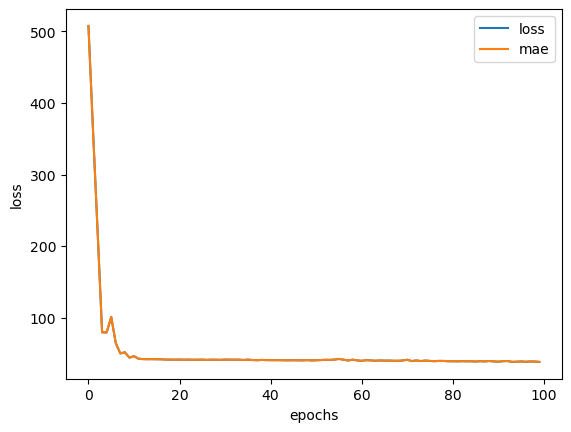

In [55]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

2/2 [==============================] - 0s 5ms/step


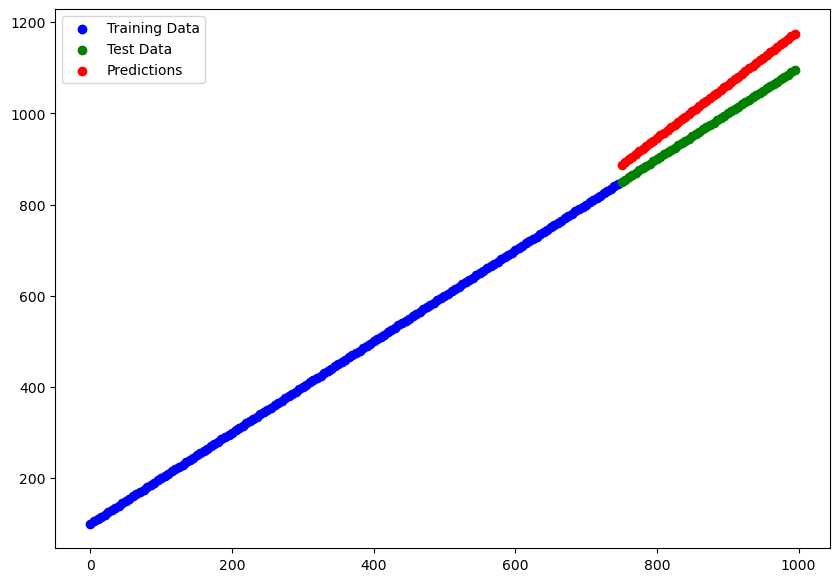

In [59]:
y_reg_preds = model3_reg.predict(X_reg_test)
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training Data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test Data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

## The missing piece: Non-linearity

In [68]:
X_train.shape

(800, 2)

In [95]:
tf.random.set_seed(RANDOM_STATE)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model4.compile(optimizer=tf.keras.optimizers.Adam(),
               loss="binary_crossentropy",
               metrics=['accuracy'])
history = model4.fit(X_train, y_train, epochs=100)

Epoch 1/100


2023-09-14 14:00:19.205144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 7ms/step - loss: 6.1060 - accuracy: 0.4900
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 6.0916 - accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 6.0871 - accuracy: 0.4900
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 6.0855 - accuracy: 0.4900
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 6.0601 - accuracy: 0.4913
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 6.0398 - accuracy: 0.4950
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 6.0288 - accuracy: 0.4975
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 6.0136 - accuracy: 0.4963
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 6.0022 - accuracy: 0.4963
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 6.0017 - accuracy: 0.4963
Epoch 11/100
25/25 [=

Text(0, 0.5, 'loss')

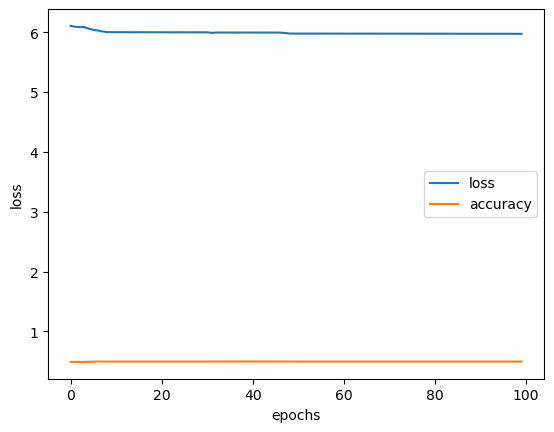

In [96]:
pd.DataFrame(history.history['loss']).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

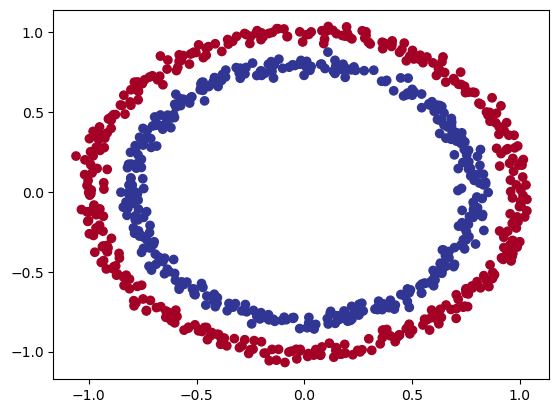

In [97]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu)

In [98]:
loss = model4.evaluate(X_test, y_test)
loss

7/7 [==============================] - 0s 11ms/step - loss: 6.5513 - accuracy: 0.4700


2023-09-14 14:00:33.131742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[6.551324367523193, 0.4699999988079071]

105/313 [=========>....................] - ETA: 0s

2023-09-14 14:00:33.338302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
Doing binary classification


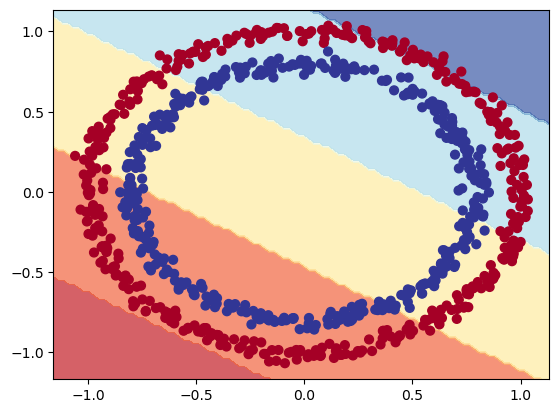

In [99]:
plot_decision_boundary(model4, X_train, y_train)

In [123]:
tf.random.set_seed(RANDOM_STATE)
model_relu = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])
model_relu.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])
history = model_relu.fit(X_train, y_train, epochs=100)

Epoch 1/100


2023-09-14 14:12:30.051011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 0s 7ms/step - loss: 6.2690 - accuracy: 0.4800
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 6.2633 - accuracy: 0.4800
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 6.2630 - accuracy: 0.4800
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 6.2620 - accuracy: 0.4800
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 6.2609 - accuracy: 0.4800
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 6.2600 - accuracy: 0.4800
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 6.2592 - accuracy: 0.4800
Epoch 8/100
25/25 [==============================] - 0s 10ms/step - loss: 6.2584 - accuracy: 0.4800
Epoch 9/100
25/25 [==============================] - 0s 8ms/step - loss: 6.2474 - accuracy: 0.4800
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 6.2316 - accuracy: 0.4837
Epoch 11/100
25/25 [

Text(0, 0.5, 'loss')

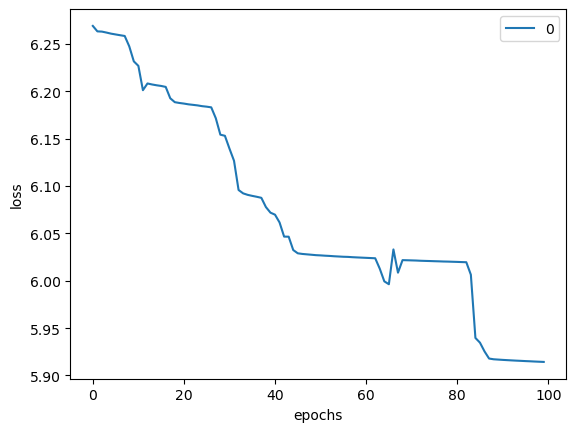

In [124]:
pd.DataFrame(history.history['loss']).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [135]:
tf.random.set_seed(RANDOM_STATE)
model_relu_2_hidden = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1),
])

model_relu_2_hidden.compile(loss="binary_crossentropy",
                            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                            metrics=['accuracy'])
history = model_relu_2_hidden.fit(X_train, y_train, epochs=250)

Epoch 1/250
 1/25 [>.............................] - ETA: 9s - loss: 4.7766 - accuracy: 0.5312

2023-09-14 14:17:18.781360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 8ms/step - loss: 4.1074 - accuracy: 0.5000
Epoch 2/250
25/25 [==============================] - 0s 6ms/step - loss: 3.5032 - accuracy: 0.4950
Epoch 3/250
25/25 [==============================] - 0s 6ms/step - loss: 2.5402 - accuracy: 0.4250
Epoch 4/250
25/25 [==============================] - 0s 7ms/step - loss: 1.1544 - accuracy: 0.4300
Epoch 5/250
25/25 [==============================] - 0s 6ms/step - loss: 0.8858 - accuracy: 0.4500
Epoch 6/250
25/25 [==============================] - 0s 6ms/step - loss: 0.8473 - accuracy: 0.4600
Epoch 7/250
25/25 [==============================] - 0s 7ms/step - loss: 0.8222 - accuracy: 0.4675
Epoch 8/250
25/25 [==============================] - 0s 8ms/step - loss: 0.8028 - accuracy: 0.4700
Epoch 9/250
25/25 [==============================] - 0s 6ms/step - loss: 0.7875 - accuracy: 0.4675
Epoch 10/250
25/25 [==============================] - 0s 6ms/step - loss: 0.7743 - accuracy: 0.4688
Epoch 11/250
25/25 [=

In [136]:
model_relu_2_hidden.evaluate(X_test, y_test)

7/7 [==============================] - 0s 13ms/step - loss: 0.6926 - accuracy: 0.5000


2023-09-14 14:17:59.605825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


[0.6925852298736572, 0.5]

Text(0, 0.5, 'loss')

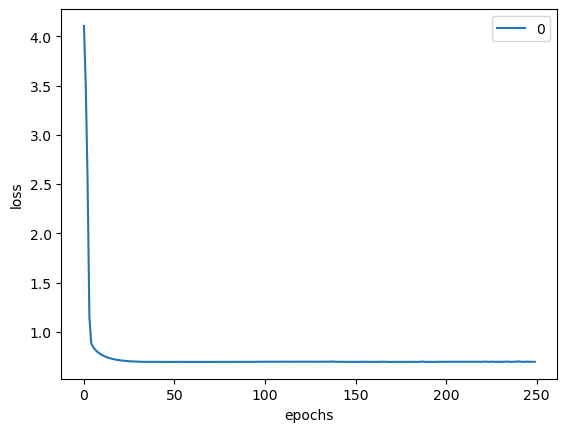

In [137]:
pd.DataFrame(history.history['loss']).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

102/313 [========>.....................] - ETA: 0s

2023-09-14 14:17:59.969500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step
Doing binary classification


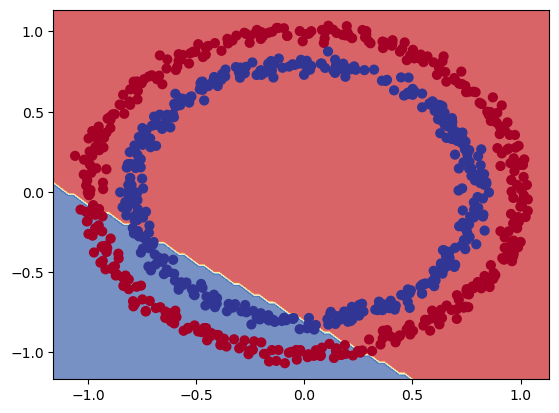

In [138]:
plot_decision_boundary(model_relu_2_hidden, X_train, y_train)

In [195]:
tf.random.set_seed(RANDOM_STATE)
model_relu_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_relu_3.compile(optimizer='Adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])
history = model_relu_3.fit(X_train, y_train, epochs=100)

Epoch 1/100


2023-09-14 19:26:17.352352: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 9ms/step - loss: 0.6953 - accuracy: 0.4487
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6954 - accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5188
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6951 - accuracy: 0.5125
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6942 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6949 - accuracy: 0.4500
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6937 - accuracy: 0.5125
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6938 - accuracy: 0.5025
Epoch 9/100
25/25 [==============================] - 0s 13ms/step - loss: 0.6948 - accuracy: 0.4925
Epoch 10/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6955 - accuracy: 0.4900
Epoch 11/100
25/25 [

In [196]:
model_relu_3.evaluate(X_test, y_test)

2023-09-14 19:26:33.478350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 17ms/step - loss: 0.4507 - accuracy: 0.9900


[0.4507468044757843, 0.9900000095367432]

Text(0, 0.5, 'loss')

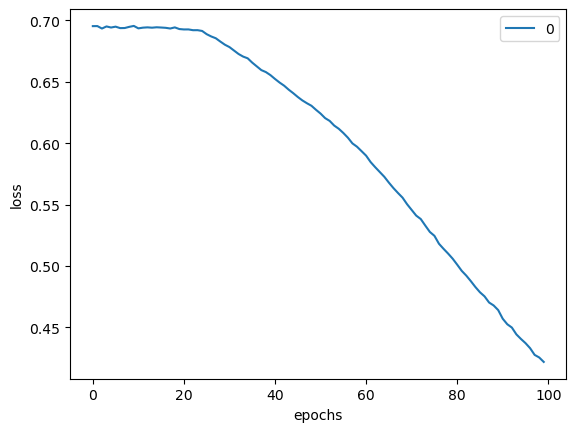

In [197]:
pd.DataFrame(history.history['loss']).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

 87/313 [=======>......................] - ETA: 0s

2023-09-14 19:26:33.980469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Doing binary classification


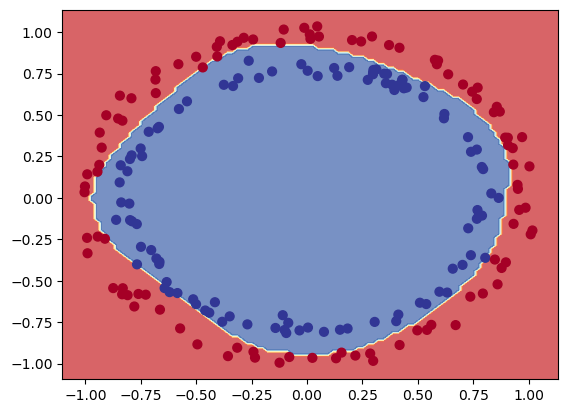

In [198]:
plot_decision_boundary(model_relu_3, X_test, y_test)

**Question:** What is wrong with the predictions that we have made. Are we evaluating the model correctly?

## Replicating Non-linear Activation functions

In [199]:
# Create a toy tensor
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

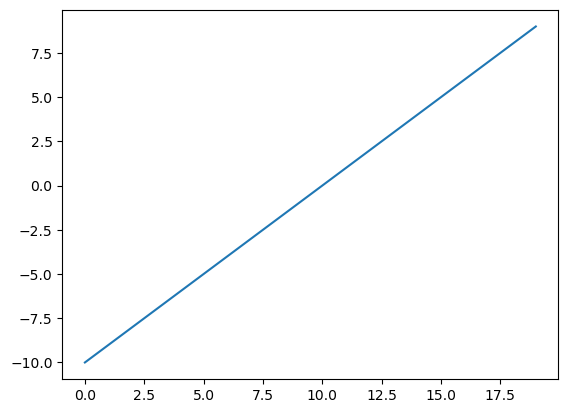

In [201]:
plt.plot(A)  # linear line

In [206]:
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

In [207]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.53978682e-05, 1.23394580e-04, 3.35350138e-04, 9.11051175e-04,
       2.47262325e-03, 6.69285096e-03, 1.79862101e-02, 4.74258736e-02,
       1.19202934e-01, 2.68941432e-01, 5.00000000e-01, 7.31058598e-01,
       8.80797148e-01, 9.52574134e-01, 9.82013762e-01, 9.93307173e-01,
       9.97527421e-01, 9.99089003e-01, 9.99664664e-01, 9.99876618e-01],
      dtype=float32)>

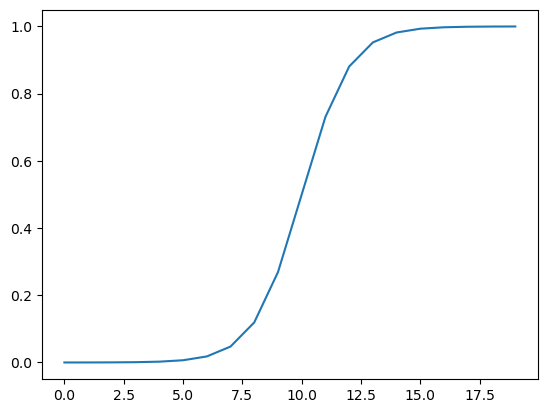

In [209]:
plt.plot(sigmoid(A))

In [212]:
def relu(x):
    return tf.maximum(x, 0)

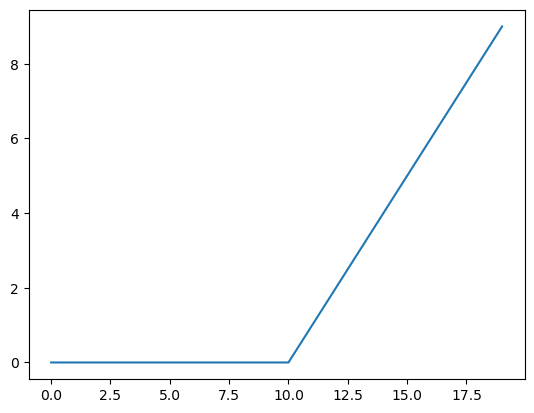

In [213]:
plt.plot(relu(A))

In [214]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

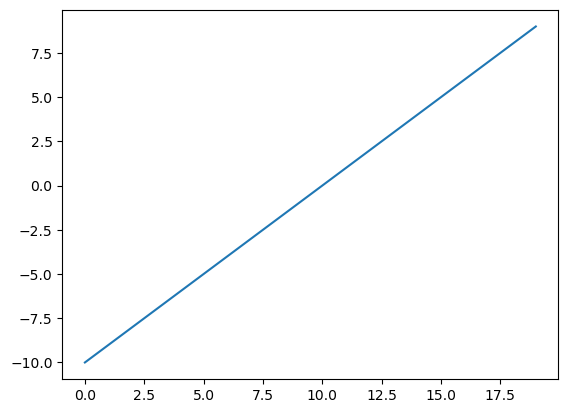

In [215]:
plt.plot(tf.keras.activations.linear(A))

In [216]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Getting results in less time by tweaking

In [217]:
len(X)

1000

In [219]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [224]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[:200], y[:200]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [243]:
tf.random.set_seed(RANDOM_STATE)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=tf.keras.activations.tanh),
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(50, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=['accuracy'])
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25


2023-09-14 20:02:52.692231: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 10ms/step - loss: 0.6984 - accuracy: 0.5125
Epoch 2/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6978 - accuracy: 0.5050
Epoch 3/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6965 - accuracy: 0.4975
Epoch 4/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6875 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6859 - accuracy: 0.5400
Epoch 6/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6777 - accuracy: 0.5713
Epoch 7/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6681 - accuracy: 0.6488
Epoch 8/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6630 - accuracy: 0.6500
Epoch 9/25
25/25 [==============================] - 0s 8ms/step - loss: 0.6513 - accuracy: 0.6587
Epoch 10/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6371 - accuracy: 0.7113
Epoch 11/25
25/25 [==========

In [244]:
model_8.evaluate(X_test, y_test)

1/7 [===>..........................] - ETA: 1s - loss: 0.1976 - accuracy: 1.0000

2023-09-14 20:03:13.849823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 22ms/step - loss: 0.2093 - accuracy: 0.9950


[0.20927055180072784, 0.9950000047683716]

Text(0, 0.5, 'loss')

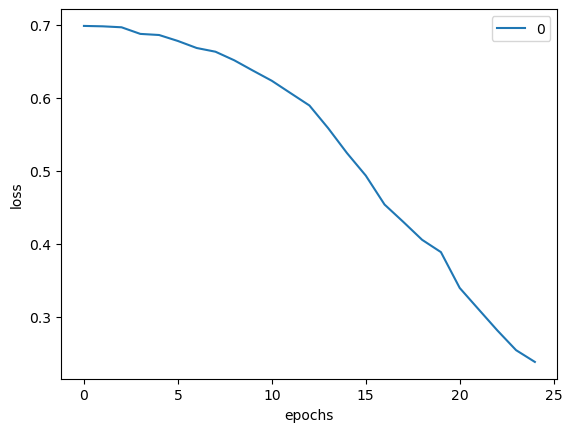

In [248]:
pd.DataFrame(history.history['loss']).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 1s 2ms/step
Doing binary classification


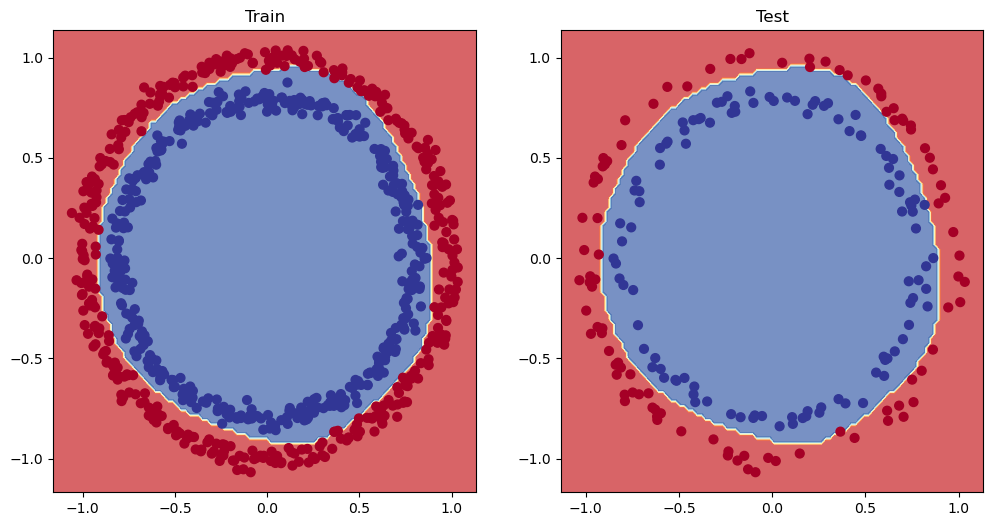

In [247]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

## How can we visualize the training history

In [251]:
pd.DataFrame(history.history)

,loss,accuracy
0,69.837767,51.249999
1,69.782394,50.500000
2,69.651049,49.750000
3,68.745124,57.749999
4,68.592513,54.000002
5,67.774671,57.125002
6,66.811836,64.875001
7,66.302878,64.999998
8,65.126914,65.875000
9,63.705599,71.125001


Text(0.5, 1.0, 'Model 8 Loss curves')

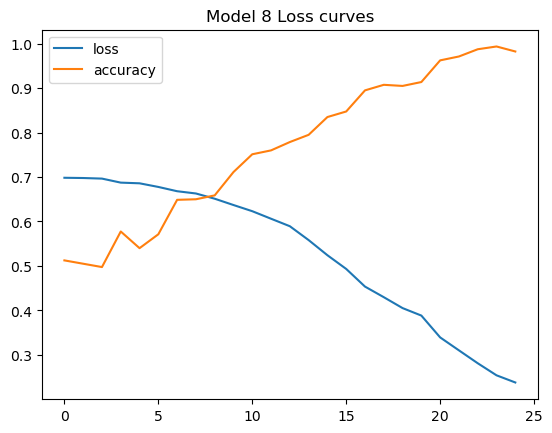

In [252]:
pd.DataFrame(history.history).plot()
plt.title("Model 8 Loss curves")  # This is ideal curve.

## Finding the best lerning rate

To find the best LR that rapidly reduces the loss we are going to do the following steps:
* A learning rate **callback**: extra piece of functionality as it's training.
* A modified loss curves plot.

In [254]:
model_8.summary()

Model: "sequential_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_214 (Dense)           (None, 100)               300       
                                                                 
 dense_215 (Dense)           (None, 100)               10100     
                                                                 
 dense_216 (Dense)           (None, 50)                5050      
                                                                 
 dense_217 (Dense)           (None, 10)                510       
                                                                 
 dense_218 (Dense)           (None, 1)                 11        
                                                                 
Total params: 15971 (62.39 KB)
Trainable params: 15971 (62.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [256]:
tf.random.set_seed(RANDOM_STATE)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(50, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100


2023-09-14 20:21:21.397308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.5175 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.5225 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6928 - accuracy: 0.5250 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.5075 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.5263 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5125 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5163 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5175 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6934 - ac

<Axes: xlabel='epochs'>

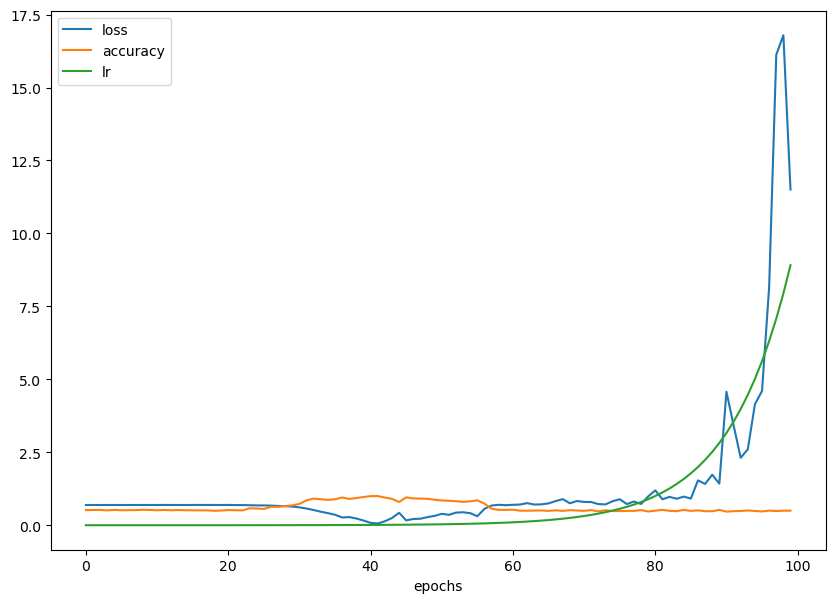

In [258]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

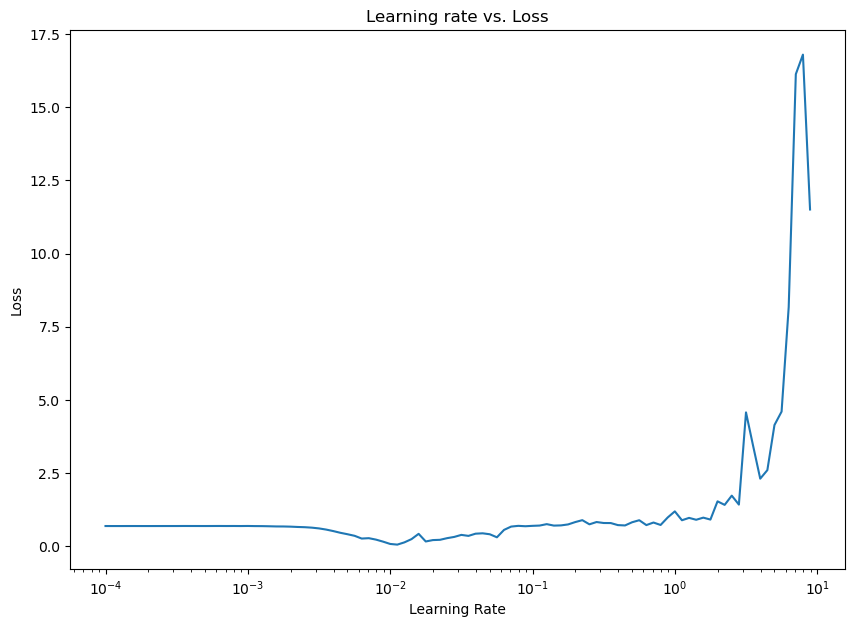

In [269]:
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(history_9.history['lr'], history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

In [270]:
np.argmin(history_9.history['loss'])

41

In [271]:
history_9.history['lr'][np.argmin(history_9.history['loss'])]

0.011220184

In [272]:
# 10 times lesser than the minima which is
history_9.history['lr'][np.argmin(history_9.history['loss'])] / 10

0.0011220184154808522

In [282]:
tf.random.set_seed(RANDOM_STATE)
model_9_min_lr = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='tanh'),
    tf.keras.layers.Dense(50, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_9_min_lr.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0011220184154808522),
                       loss=tf.keras.losses.BinaryCrossentropy(),
                       metrics=['accuracy'])
history_9_min_lr = model_9_min_lr.fit(X_train, y_train, epochs=45)

Epoch 1/45


2023-09-14 20:43:40.383946: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 1s 12ms/step - loss: 0.6982 - accuracy: 0.4863
Epoch 2/45
25/25 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.4988
Epoch 3/45
25/25 [==============================] - 0s 13ms/step - loss: 0.6947 - accuracy: 0.4988
Epoch 4/45
25/25 [==============================] - 0s 15ms/step - loss: 0.6928 - accuracy: 0.5163
Epoch 5/45
25/25 [==============================] - 0s 18ms/step - loss: 0.6939 - accuracy: 0.5250
Epoch 6/45
25/25 [==============================] - 0s 13ms/step - loss: 0.6900 - accuracy: 0.5275
Epoch 7/45
25/25 [==============================] - 0s 9ms/step - loss: 0.6825 - accuracy: 0.6200
Epoch 8/45
25/25 [==============================] - 0s 10ms/step - loss: 0.6775 - accuracy: 0.5975
Epoch 9/45
25/25 [==============================] - 0s 10ms/step - loss: 0.6682 - accuracy: 0.6263
Epoch 10/45
25/25 [==============================] - 0s 10ms/step - loss: 0.6586 - accuracy: 0.6388
Epoch 11/45
25/25 [===

In [283]:
model_9_min_lr.evaluate(X_test, y_test)

2023-09-14 20:43:51.251310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 20ms/step - loss: 0.1097 - accuracy: 1.0000


[0.10966133326292038, 1.0]

 84/313 [=======>......................] - ETA: 0s

2023-09-14 20:43:51.757467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Doing binary classification


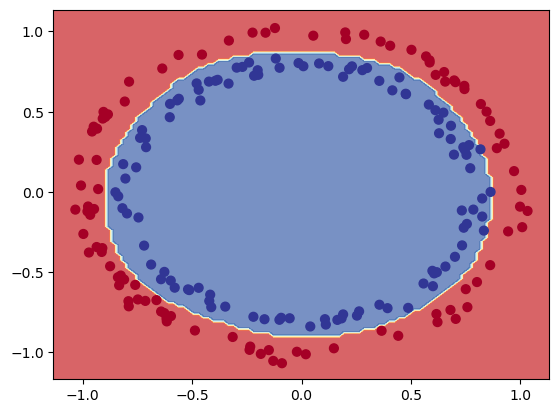

In [284]:
plot_decision_boundary(model_9_min_lr, X_test, y_test)

Text(0, 0.5, 'Accuracy & loss')

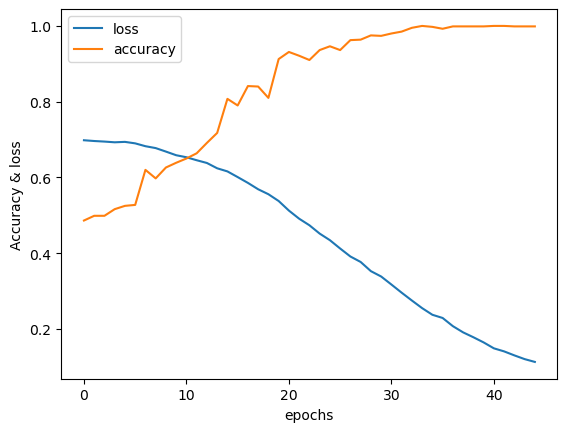

In [285]:
pd.DataFrame(history_9_min_lr.history).plot()
plt.xlabel('epochs')
plt.ylabel('Accuracy & loss')

## Other Metrics
* Accuracy
* Precision - higher means less FP
* Recall - higher means less FN
* F1-score - tradeoff btw Precision and Recall
* Confusion Matrix
* Classification report

In [287]:
# Check the accuracy of our model
loss, accuracy = model_9_min_lr.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 17ms/step - loss: 0.1097 - accuracy: 1.0000
Model loss on the test set: 0.10966133326292038
Model accuracy on the test set: 100.00%


In [293]:
predictions = model_9_min_lr.predict(X_test)

7/7 [==============================] - 0s 16ms/step


In [294]:
y_test[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [295]:
predictions[:10]

array([[0.9040828 ],
       [0.946434  ],
       [0.84716153],
       [0.9414226 ],
       [0.1943054 ],
       [0.8911488 ],
       [0.88980705],
       [0.91028625],
       [0.9222556 ],
       [0.04984801]], dtype=float32)

Looks like the predictions are a probability which is the standard o/p of the sigmoid.
We need to convert them to the label 1/0

In [296]:
tf.round(predictions[:10])

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [297]:
# Confusion Matrix how confused is the model
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tf.round(predictions))

array([[ 96,   0],
       [  0, 104]])

In [314]:
# Prettify our CM
import itertools


def plot_confusion_matrix(test_data, predicted_data, figure_size=(10, 10)):
    cm = confusion_matrix(test_data, predicted_data)
    classes = np.unique(test_data).size > 2 or np.unique(predicted_data).size > 2
    cm_normalised = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]
    fig, ax = plt.subplots(figsize=figure_size)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    if classes:
        labels = classes
    else:
        labels = np.arange((cm.shape[0]))
    ax.set(title="Confusion matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels,
           )
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)
    threshold = (cm.max() + cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_normalised[i, j] * 100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=15)

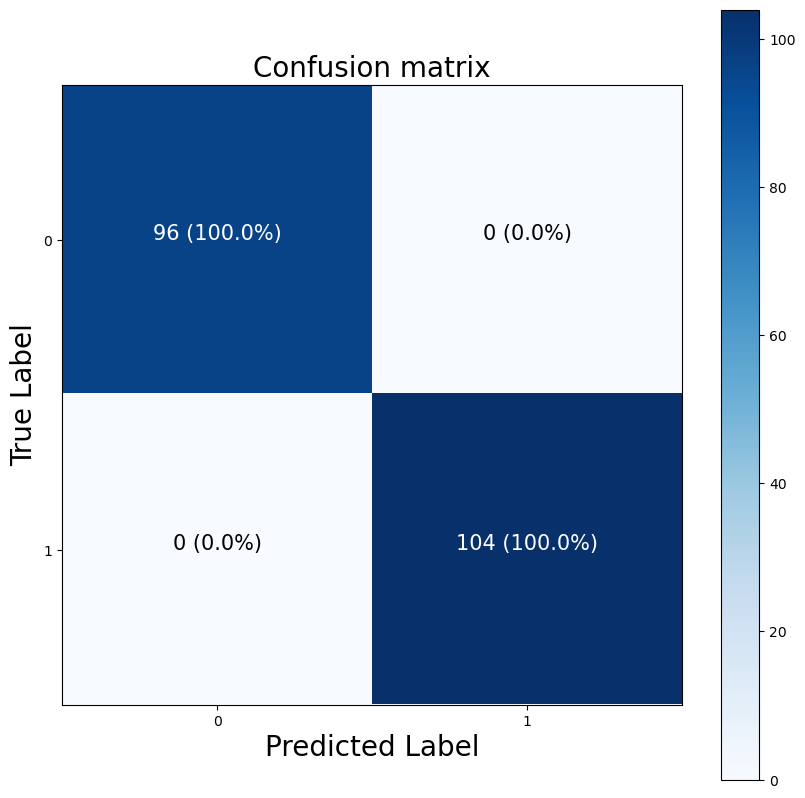

In [315]:
plot_confusion_matrix(y_test, tf.round(predictions))